In [1]:
import matplotlib.pyplot as plt
import multipsi as mtp
import numpy as np
import veloxchem as vlx

In [2]:
# HF, BLYP and CI calculation of H.
mol_str = """
H 0.0000 0.0000 0.0000
"""

molecule = vlx.Molecule.read_molecule_string(mol_str, units="angstrom")
molecule.set_multiplicity(2)
basis = vlx.MolecularBasis.read(molecule, "cc-pvdz", ostream=None)

scf_drv = vlx.ScfUnrestrictedDriver()
scf_drv.ostream.mute()
scf_results = scf_drv.compute(molecule, basis)
E_H_hf = scf_drv.get_scf_energy()

scf_drv.xcfun = "BLYP"
scf_results = scf_drv.compute(molecule, basis)
E_H_blyp = scf_drv.get_scf_energy()

space = mtp.OrbSpace(molecule, scf_drv.mol_orbs)
space.fci()
CIdrv = mtp.CIDriver()
ci_results = CIdrv.compute(molecule, basis, space)
E_H_FCI = ci_results["energies"][0]

# HF, BLYP and CI calculations of H2 dissociation

mol_template = """
H 0.0000 0.0000 -H2dist
H 0.0000 0.0000  H2dist
"""
scf_drv = vlx.ScfRestrictedDriver()
dft_drv = vlx.ScfRestrictedDriver()
scf_drv.ostream.mute()
dft_drv.ostream.mute()
dft_drv.xcfun = "BLYP"

distlist = [
    0.5,
    0.6,
    0.65,
    0.7,
    0.75,
    0.8,
    0.9,
    1,
    1.2,
    1.4,
    1.5,
    1.6,
    1.7,
    2,
    2.5,
    3,
    4,
]
E_hf = []
E_blyp = []
E_FCI = []

# Scan over O-H distances
for dist in distlist:
    mol_str = mol_template.replace("H2dist", str(dist / 2))
    molecule = vlx.Molecule.read_molecule_string(mol_str, units="angstrom")
    basis = vlx.MolecularBasis.read(molecule, "cc-pvdz", ostream=None)
    scf_results = scf_drv.compute(molecule, basis)
    E_hf.append(scf_drv.get_scf_energy() - 2 * E_H_hf)

    dft_results = dft_drv.compute(molecule, basis)
    E_blyp.append(dft_drv.get_scf_energy() - 2 * E_H_blyp)

    space = mtp.OrbSpace(molecule, scf_drv.mol_orbs)
    space.fci()
    ci_results = CIdrv.compute(molecule, basis, space)
    E_FCI.append(ci_results["energies"][0] - 2 * E_H_hf)

                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              5
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(1,5)

               CI expansion:
               -------------
               Number of determinants:      5


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.75  (multiplicity = 2.0 )
  - Energy : -0.4992784034195829
  - Natural orbitals
1.00000 -0.00000 -0.00000 -0.00000 0.00000


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.0793700508927995
  - Natural orbitals
1.97719 0.00008 0.00501 0.00970 0.00380 0.00380 0.00013 0.00013 0.00013 0.00001


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : -0.00  (multiplicity = 1.0 )
  - Energy : -1.1391732932951442
  - Natural orbitals
1.97340 0.01319 0.00564 0.00001 0.00360 0.00360 0.00016 0.00015 0.00015 0.00011


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.153371342132732
  - Natural orbitals
1.97119 0.01541 0.00587 0.00001 0.00346 0.00346 0.00017 0.00015 0.00015 0.00013


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.1609046824806615
  - Natural orbitals
1.96871 0.01801 0.00602 0.00001 0.00331 0.00331 0.00019 0.00015 0.00015 0.00014


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.1635935606538266
  - Natural orbitals
1.96588 0.02104 0.00611 0.00001 0.00314 0.00314 0.00020 0.00016 0.00016 0.00016


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.1627507630215586
  - Natural orbitals
1.96266 0.02457 0.00613 0.00017 0.00296 0.00296 0.00022 0.00016 0.00016 0.00001


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : -0.00  (multiplicity = 1.0 )
  - Energy : -1.1540817061165278
  - Natural orbitals
1.95470 0.03339 0.00599 0.00020 0.00257 0.00257 0.00025 0.00016 0.00016 0.00002


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : -0.00  (multiplicity = 1.0 )
  - Energy : -1.1400734808710464
  - Natural orbitals
1.94416 0.04503 0.00565 0.00022 0.00217 0.00217 0.00027 0.00016 0.00016 0.00002


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.1068551925482566
  - Natural orbitals
1.91211 0.07966 0.00454 0.00024 0.00142 0.00142 0.00030 0.00015 0.00015 0.00002


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.0752705377355678
  - Natural orbitals
1.85968 0.13468 0.00315 0.00022 0.00028 0.00085 0.00085 0.00013 0.00013 0.00003


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : -0.00  (multiplicity = 1.0 )
  - Energy : -1.0615349496253943
  - Natural orbitals
1.82407 0.17146 0.00246 0.00020 0.00026 0.00065 0.00065 0.00011 0.00011 0.00003


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.0494644468938426
  - Natural orbitals
1.78192 0.21465 0.00184 0.00017 0.00023 0.00049 0.00049 0.00010 0.00010 0.00002


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : -0.00  (multiplicity = 1.0 )
  - Energy : -1.0391133471401912
  - Natural orbitals
1.73370 0.26374 0.00014 0.00132 0.00020 0.00036 0.00036 0.00008 0.00008 0.00002


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.0175941140438791
  - Natural orbitals
1.56605 0.43300 0.00006 0.00010 0.00041 0.00014 0.00014 0.00004 0.00004 0.00001


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.0031292512270586
  - Natural orbitals
1.30747 0.69238 0.00002 0.00001 0.00006 0.00003 0.00003 0.00001 0.00001 0.00000


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : -0.00  (multiplicity = 1.0 )
  - Energy : -0.9995506185969397
  - Natural orbitals
1.15006 0.84991 0.00000 0.00000 0.00001 0.00001 0.00001 0.00000 0.00000 0.00000


                                                                                                                          
                          Configuration Interaction Driver
                                                                                                                          

               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              10
               Number of virtual orbitals:             0

               This is a CASSCF wavefunction: CAS(2,10)

               CI expansion:
               -------------
               Number of determinants:      100


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰─────────────────────────────

                                                                                                                          
** Convergence reached in 0 iterations
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : -0.00  (multiplicity = 1.0 )
  - Energy : -0.9986061861413538
  - Natural orbitals
1.03178 0.96822 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000


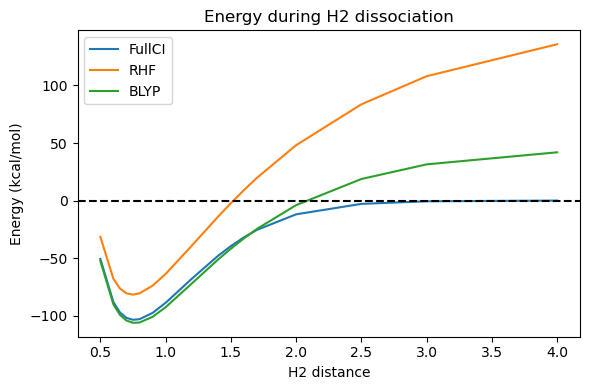

In [3]:
plt.figure(figsize=(6, 4))
plt.title("Energy during H2 dissociation")
x = np.array(distlist)
y1 = np.array(E_FCI) * 627.5
y2 = np.array(E_hf) * 627.5
y3 = np.array(E_blyp) * 627.5
plt.plot(x, y1, label="FullCI")
plt.plot(x, y2, label="RHF")
plt.plot(x, y3, label="BLYP")
plt.axhline(y=0, color="k", linestyle="--")
plt.xlabel("H2 distance")
plt.ylabel("Energy (kcal/mol)")
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
# Broken-symmetry BLYP calculation of H2

bs_drv = vlx.ScfUnrestrictedDriver()
bs_drv.ostream.mute()
bs_drv.xcfun = "BLYP"
bs_drv.guess_unpaired_electrons = "1(1), 2(-1)"  # alpha on atom 1 and beta on atom 2

E_bs = []

# Scan over O-H distances
for dist in distlist:
    mol_str = mol_template.replace("H2dist", str(dist / 2))
    molecule = vlx.Molecule.read_molecule_string(mol_str, units="angstrom")
    basis = vlx.MolecularBasis.read(molecule, "cc-pvdz")

    bs_results = bs_drv.compute(molecule, basis)
    E_bs.append(bs_drv.get_scf_energy() - 2 * E_H_blyp)

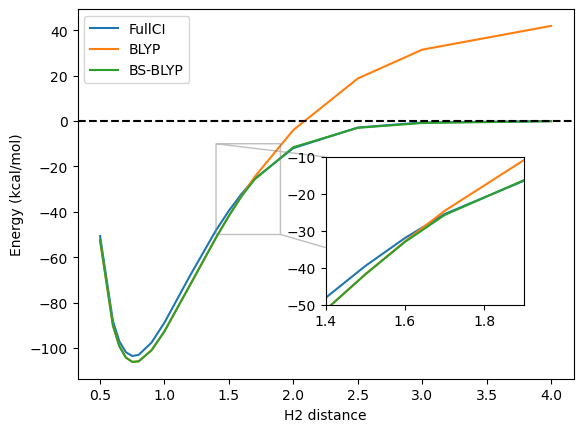

In [5]:
y4 = np.array(E_bs) * 627.5

fig, ax = plt.subplots()
ax.plot(x, y1, label="FullCI")
ax.plot(x, y3, label="BLYP")
ax.plot(x, y4, label="BS-BLYP")
ax.axhline(y=0, color="k", linestyle="--")
ax.set_xlabel("H2 distance")
ax.set_ylabel("Energy (kcal/mol)")
ax.legend()

axin = ax.inset_axes([0.5, 0.2, 0.4, 0.4])
axin.set_xlim(1.4, 1.9)
axin.set_ylim(-50, -10)
axin.plot(x, y1, label="FullCI")
axin.plot(x, y3, label="BLYP")
axin.plot(x, y4, label="BS-BLYP")
ax.indicate_inset_zoom(axin)

plt.show()

In [6]:
# Plotting densities along the bond axis (z)
n = 100
z = np.linspace(-4, 4, n, endpoint=True)
coords = np.zeros((n, 3))
coords[:, 2] = z

# Before the bifurcation
mol_str = """
H 0.0000 0.0000 -0.75
H 0.0000 0.0000  0.75
"""
molecule = vlx.Molecule.read_molecule_string(mol_str, units="angstrom")
basis = vlx.MolecularBasis.read(molecule, "cc-pvdz")

bs_tensor = bs_drv.compute(molecule, basis)

vis_drv = vlx.VisualizationDriver()
rho1_a = vis_drv.get_density(coords, molecule, basis, bs_drv.density, "alpha")
rho1_b = vis_drv.get_density(coords, molecule, basis, bs_drv.density, "beta")

# After the bifurcation
mol_str = """
H 0.0000 0.0000 -0.85
H 0.0000 0.0000  0.85
"""
molecule = vlx.Molecule.read_molecule_string(mol_str, units="angstrom")
basis = vlx.MolecularBasis.read(molecule, "cc-pvdz")

bs_tensor = bs_drv.compute(molecule, basis)

vis_drv = vlx.VisualizationDriver()
rho2_a = vis_drv.get_density(coords, molecule, basis, bs_drv.density, "alpha")
rho2_b = vis_drv.get_density(coords, molecule, basis, bs_drv.density, "beta")

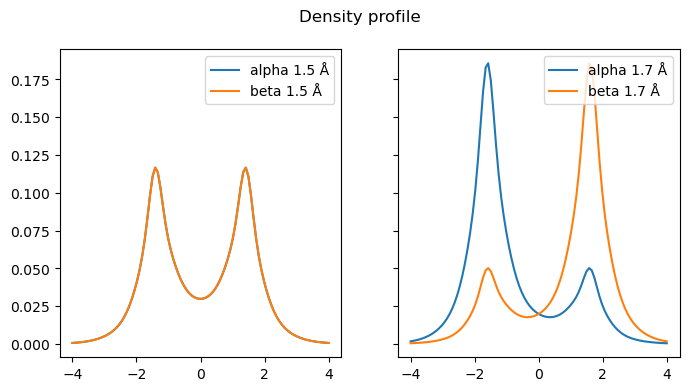

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
fig.suptitle("Density profile")
ax1.plot(z, rho1_a, label="alpha 1.5 Å")
ax1.plot(z, rho1_b, label="beta 1.5 Å")
ax2.plot(z, rho2_a, label="alpha 1.7 Å")
ax2.plot(z, rho2_b, label="beta 1.7 Å")
ax1.legend()
ax2.legend()
plt.show()

In [8]:
# Function to compute the on-top pair-density
def get_ontop(coords, molecule, basis, space, TwoDM):
    vis_drv = vlx.VisualizationDriver()
    orbital_values = []
    for i in space.active_orbitals:
        values = np.array(
            vis_drv.get_mo(
                coords, molecule, basis, space.molecular_orbitals.alpha_to_numpy(), i
            )
        )
        orbital_values.append(values)

    den_i = vlx.AODensityMatrix([space._get_inactive_density()], vlx.denmat.rest)
    rho_i = np.array(vis_drv.get_density(coords, molecule, basis, den_i, "alpha"))

    norb = space.n_active
    ontop = 2 * rho_i**2
    for i in range(norb):
        for j in range(norb):
            for k in range(norb):
                for l in range(norb):
                    ontop += (
                        TwoDM[i, j, k, l]
                        * orbital_values[i]
                        * orbital_values[j]
                        * orbital_values[k]
                        * orbital_values[l]
                    )

    return ontop

In [9]:
mol_str = """
H 0.0000 0.0000 -0.4
H 0.0000 0.0000  0.4
"""
molecule = vlx.Molecule.read_molecule_string(mol_str, units="angstrom")
basis = vlx.MolecularBasis.read(molecule, "cc-pvdz", ostream=None)

bs_tensor = bs_drv.compute(molecule, basis)
space = mtp.OrbSpace(molecule, bs_drv.mol_orbs)
space.cas(2, 2)
mcscf_drv = mtp.McscfDriver()
mcscf_drv.compute(molecule, basis, space)

den = vlx.AODensityMatrix([mcscf_drv.get_total_density()], vlx.denmat.rest)
rho1 = np.array(vis_drv.get_density(coords, molecule, basis, den, "alpha"))
ontop1 = get_ontop(
    coords, molecule, basis, space, mcscf_drv.ci_driver.get_active_2body_density(0)
)

mol_str = """
H 0.0000 0.0000 -1.0
H 0.0000 0.0000  1.0
"""
molecule = vlx.Molecule.read_molecule_string(mol_str, units="angstrom")
basis = vlx.MolecularBasis.read(molecule, "cc-pvdz", ostream=None)

bs_tensor = bs_drv.compute(molecule, basis)
space = mtp.OrbSpace(molecule, bs_drv.mol_orbs)
space.cas(2, 2)
mcscf_drv = mtp.McscfDriver()
mcscf_drv.compute(molecule, basis, space)

den = vlx.AODensityMatrix([mcscf_drv.get_total_density()], vlx.denmat.rest)
rho2 = np.array(vis_drv.get_density(coords, molecule, basis, den, "alpha"))
ontop2 = get_ontop(
    coords, molecule, basis, space, mcscf_drv.ci_driver.get_active_2body_density(0)
)

                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              2
               Number of virtual orbitals:             8

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -1.132732364     0.0e+00      8.7e-04          0        0.40    0:00:00


        2     -1.144265764    -1.2e-02      3.0e-04          0        0.40    0:00:00


        3     -1.144120342     1.5e-04      2.0e-04          0        0.56    0:00:00


        4     -1.146782281    -2.7e-03      7.8e-05          0        0.28    0:00:00


        5     -1.146923513    -1.4e-04      5.1e-06          0        0.34    0:00:00


        6     -1.146972984    -4.9e-05      2.3e-06          0        0.34    0:00:00


        7     -1.146973773    -7.9e-07      2.7e-07          0        0.34    0:00:00


        8     -1.146973861    -8.8e-08      4.7e-11          0        0.40    0:00:00


        9     -1.146973861    -8.8e-11      1.4e-12          0        0.40    0:00:00
** Convergence reached in 9 iterations


       10     -1.146973861    -1.2e-12      7.3e-14          0        0.40    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.1469738614494012
  - Natural orbitals
1.97146 0.02854
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              2
               Number of virtual orbitals:             8

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
                                                                                                                          
               Number of states              :   1
   

        1     -1.006840858     0.0e+00      6.1e-03          0        0.40    0:00:00


        2     -1.014742702    -7.9e-03      9.5e-04          0        0.40    0:00:00


        3     -1.016233350    -1.5e-03      8.2e-05          0        0.48    0:00:00


        4     -1.016297647    -6.4e-05      1.7e-06          0        0.58    0:00:00


        5     -1.016299180    -1.5e-06      7.1e-08          0        0.58    0:00:00


        6     -1.016299292    -1.1e-07      2.5e-09          0        0.69    0:00:00


        7     -1.016299294    -2.5e-09      1.1e-10          0        0.69    0:00:00
** Convergence reached in 7 iterations


        8     -1.016299294    -9.2e-11      2.3e-12          0        0.80    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.0162992942219333
  - Natural orbitals
1.54881 0.45119
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :         0.000000 a.u.         0.000001 Debye                                     
                                 Total :         0.000000 a.u.         0.000001 Debye                                     
                

                                                                                                                          
Total MCSCF time: 00:00:00


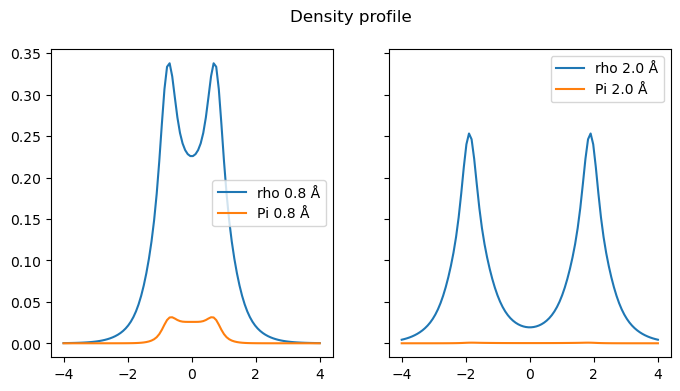

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
fig.suptitle("Density profile")
ax1.plot(z, rho1, label="rho 0.8 Å")
ax1.plot(z, ontop1, label="Pi 0.8 Å")
ax2.plot(z, rho2, label="rho 2.0 Å")
ax2.plot(z, ontop2, label="Pi 2.0 Å")
ax1.legend()
ax2.legend()
plt.show()

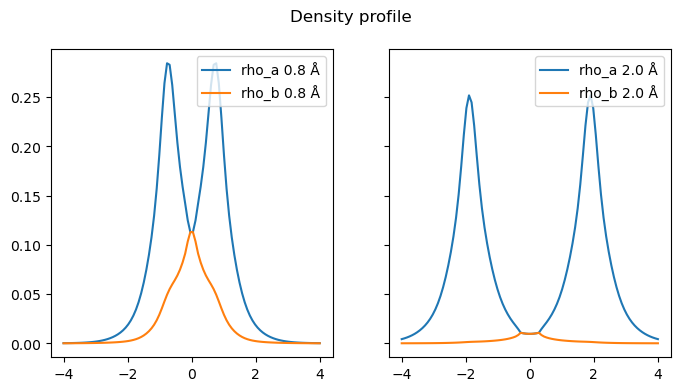

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
fig.suptitle("Density profile")
ax1.plot(
    z, 0.5 * (rho1 + np.sqrt(np.maximum(rho1**2 - 2 * ontop1, 0))), label="rho_a 0.8 Å"
)
ax1.plot(
    z, 0.5 * (rho1 - np.sqrt(np.maximum(rho1**2 - 2 * ontop1, 0))), label="rho_b 0.8 Å"
)
ax2.plot(
    z, 0.5 * (rho2 + np.sqrt(np.maximum(rho2**2 - 2 * ontop2, 0))), label="rho_a 2.0 Å"
)
ax2.plot(
    z, 0.5 * (rho2 - np.sqrt(np.maximum(rho2**2 - 2 * ontop2, 0))), label="rho_b 2.0 Å"
)
ax1.legend()
ax2.legend()
plt.show()

In [12]:
# MC-tBLYP calculation of H.
mol_str = """
H 0.0000 0.0000 0.0000
"""

molecule = vlx.Molecule.read_molecule_string(mol_str, units="angstrom")
molecule.set_multiplicity(2)
basis = vlx.MolecularBasis.read(molecule, "cc-pvdz", ostream=None)

scf_drv = vlx.ScfUnrestrictedDriver()
scf_drv.ostream.mute()
scf_results = scf_drv.compute(molecule, basis)

space = mtp.OrbSpace(molecule, scf_drv.mol_orbs)
mcscf_drv = mtp.McscfDriver()
mcscf_drv.xcfun = "tBLYP"
mcscf_results = mcscf_drv.compute(molecule, basis, space)
E_H_tBLYP = mcscf_results["energies"][0]

# MC-tBLYP calculation of H2 dissociation

mol_template = """
H 0.0000 0.0000 -H2dist
H 0.0000 0.0000  H2dist
"""
mol_str = mol_template.replace("H2dist", str(0.5))
molecule = vlx.Molecule.read_molecule_string(mol_str, units="angstrom")
basis = vlx.MolecularBasis.read(molecule, "cc-pvdz")

scf_drv = vlx.ScfRestrictedDriver()
scf_results = scf_drv.compute(molecule, basis)

space = mtp.OrbSpace(molecule, scf_drv.mol_orbs)
space.cas(2, 2)

mcscf_drv = mtp.McscfDriver()
mcscf_drv.xcfun = "tBLYP"
mcscf_results = mcscf_drv.compute(molecule, basis, space)

E_tblyp = []

# Scan over O-H distances
for dist in distlist:
    mol_str = mol_template.replace("H2dist", str(dist / 2))
    print(mol_str)
    molecule = vlx.Molecule.read_molecule_string(mol_str, units="angstrom")
    basis = vlx.MolecularBasis.read(molecule, "cc-pvdz")

    mcscf_results = mcscf_drv.compute(molecule, basis, space)
    E_tblyp.append(mcscf_results["energies"][0] - 2 * E_H_tBLYP)

                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              1
               Number of virtual orbitals:             4

               This is a restricted open-shell Hartree-Fock wavefunction
               Equivalent to a CASSCF: CAS(1,1)

               CI expansion:
               -------------
               Number of determinants:      1


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
               Functional                    :   tBLYP
               Grid level                    :   4
     

        1     -0.496396612     0.0e+00      4.8e-06          0        0.40    0:00:00


        2     -0.496403223    -6.6e-06      2.2e-08          0        0.40    0:00:00


        3     -0.496403253    -3.0e-08      8.5e-19          0        0.40    0:00:00


        4     -0.496403253     1.1e-16      4.1e-28          0        0.40    0:00:00
** Convergence reached in 4 iterations


        5     -0.496403253    -2.2e-16      2.1e-30          0        0.20    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.75  (multiplicity = 2.0 )
  - Energy : -0.4964032526736797
  - Natural orbitals
1.00000
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                          
     

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :         0.000000 a.u.         0.000000 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
Total MC-PDFT time: 00:00:00


                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -1.095959327021 a.u. Time: 0.01 sec.                                   
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1        -1.100056242572    0.0000000000      0.02692675      0.00838888      0.00000000                


                  2        -1.100153689745   -0.0000974472      0.00051916      0.00017723      0.00493758                


                  3        -1.100153764817   -0.0000000751      0.00001420      0.00000490      0.00030702                


                  4        -1.100153764873   -0.0000000001      0.00000000      0.00000000      0.00000815                


                                                                                                                          
               *** SCF converged in 4 iterations. Time: 0.02 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :       -1.1001537649 a.u.                                              
               Electronic Energy                  :       -1.6293309758 a.u.                                              
               Nuclear Repulsion Energy           :        0.5291772109 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000000003 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              2
               Number of virtual orbitals:             8

               This is a CASSCF wavefunction: CAS(2,2)



               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
               Functional                    :   tBLYP
               Grid level                    :   4
                                                                                                                          
               Number of states              :   1
               State-specific calculation
                - State of interest          :   1
               Max. iterations               :   50
               BFGS window                   :   5
         

        1     -1.143566905     0.0e+00      2.9e-03          3        0.40    0:00:00


        2     -1.148744929    -5.2e-03      3.7e-05          3        0.40    0:00:00


        3     -1.148804404    -5.9e-05      2.6e-04          1        0.56    0:00:00


        4     -1.149283138    -4.8e-04      3.9e-06          2        0.39    0:00:00


        5     -1.149308941    -2.6e-05      1.5e-06          1        0.47    0:00:00


        6     -1.149314715    -5.8e-06      3.7e-09          1        0.47    0:00:00


        7     -1.149314739    -2.4e-08      1.1e-09          1        0.47    0:00:00


        8     -1.149314740    -1.2e-09      7.0e-12          1        0.66    0:00:00
** Convergence reached in 8 iterations


        9     -1.149314740    -1.9e-10      4.5e-13          1        0.66    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.1493147401753794
  - Natural orbitals
1.98225 0.01775
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :         0.000000 a.u.         0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
Total MC-PDFT time: 00:00:00



H 0.0000 0.0000 -0.25
H 0.0000 0.0000  0.25

                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              2
               Number of virtual orbitals:             8

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
               Functional                    :   tBLYP
               Grid level                    :   4
                                                                       

        1     -1.052531702     0.0e+00      6.5e-02          4        0.40    0:00:00


        2     -1.077736324    -2.5e-02      1.1e-02          3        0.40    0:00:00


        3     -1.082355030    -4.6e-03      1.5e-05          1        0.40    0:00:00


        4     -1.082365211    -1.0e-05      2.7e-08          1        0.40    0:00:00


        5     -1.082365479    -2.7e-07      4.3e-09          1        0.40    0:00:00


        6     -1.082365530    -5.2e-08      7.8e-11          1        0.48    0:00:00


        7     -1.082365532    -1.5e-09      5.6e-12          1        0.48    0:00:00
** Convergence reached in 7 iterations


        8     -1.082365532    -1.3e-10      9.7e-14          1        0.58    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.0823655319550114
  - Natural orbitals
1.99459 0.00541
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :         0.000000 a.u.         0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
Total MC-PDFT time: 00:00:00



H 0.0000 0.0000 -0.3
H 0.0000 0.0000  0.3

                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              2
               Number of virtual orbitals:             8

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
               Functional                    :   tBLYP
               Grid level                    :   4
                                                                       

        1     -1.140693285     0.0e+00      5.1e-03          4        0.40    0:00:00


        2     -1.142678023    -2.0e-03      4.0e-04          3        0.40    0:00:00


        3     -1.142879960    -2.0e-04      6.5e-08          1        0.40    0:00:00


        4     -1.142880048    -8.8e-08      3.8e-10          1        0.40    0:00:00


        5     -1.142880064    -1.5e-08      8.1e-10          1        0.48    0:00:00


        6     -1.142880065    -1.1e-09      4.7e-11          1        0.48    0:00:00
** Convergence reached in 6 iterations


        7     -1.142880065    -5.6e-11      2.2e-14          1        0.58    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.1428800648154205
  - Natural orbitals
1.99327 0.00673
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :         0.000000 a.u.         0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
Total MC-PDFT time: 00:00:00



H 0.0000 0.0000 -0.325
H 0.0000 0.0000  0.325

                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              2
               Number of virtual orbitals:             8

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
               Functional                    :   tBLYP
               Grid level                    :   4
                                                                       

        1     -1.157196278     0.0e+00      9.1e-04          4        0.40    0:00:00


        2     -1.157570595    -3.7e-04      8.1e-05          3        0.40    0:00:00


        3     -1.157611169    -4.1e-05      1.9e-09          1        0.40    0:00:00


        4     -1.157611175    -6.0e-09      2.2e-11          1        0.40    0:00:00
** Convergence reached in 4 iterations


        5     -1.157611175    -4.8e-10      3.7e-12          1        0.48    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.1576111752292284
  - Natural orbitals
1.99245 0.00755
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :         0.000000 a.u.         0.000000 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
Total MC-PDFT time: 00:00:00



H 0.0000 0.0000 -0.35
H 0.0000 0.0000  0.35

                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              2
               Number of virtual orbitals:             8

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
               Functional                    :   tBLYP
               Grid level                    :   4
                                                                       

        1     -1.165417659     0.0e+00      7.3e-04          4        0.40    0:00:00


        2     -1.165730142    -3.1e-04      6.7e-05          3        0.40    0:00:00


        3     -1.165763942    -3.4e-05      1.1e-09          1        0.40    0:00:00


        4     -1.165763946    -4.6e-09      5.0e-12          1        0.40    0:00:00
** Convergence reached in 4 iterations


        5     -1.165763946    -2.2e-10      5.4e-13          1        0.48    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.1657639463246838
  - Natural orbitals
1.99151 0.00849
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.000000 a.u.         0.000000 Debye                                     
                                   Z   :         0.000000 a.u.         0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
Total MC-PDFT time: 00:00:00



H 0.0000 0.0000 -0.375
H 0.0000 0.0000  0.375

                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              2
               Number of virtual orbitals:             8

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
               Functional                    :   tBLYP
               Grid level                    :   4
                                                                       

        1     -1.168852171     0.0e+00      5.8e-04          4        0.40    0:00:00


        2     -1.169113683    -2.6e-04      5.5e-05          3        0.40    0:00:00


        3     -1.169141466    -2.8e-05      6.9e-10          1        0.40    0:00:00


        4     -1.169141475    -8.2e-09      1.4e-11          1        0.40    0:00:00
** Convergence reached in 4 iterations


        5     -1.169141476    -1.4e-09      3.9e-12          1        0.48    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.169141475934042
  - Natural orbitals
1.99042 0.00958
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                         

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :         0.000000 a.u.         0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
Total MC-PDFT time: 00:00:00



H 0.0000 0.0000 -0.4
H 0.0000 0.0000  0.4

                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              2
               Number of virtual orbitals:             8

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
               Functional                    :   tBLYP
               Grid level                    :   4
                                                                       

        1     -1.168785514     0.0e+00      4.7e-04          4        0.40    0:00:00


        2     -1.169005415    -2.2e-04      4.4e-05          3        0.40    0:00:00


        3     -1.169028017    -2.3e-05      4.8e-10          1        0.40    0:00:00


        4     -1.169028032    -1.5e-08      4.5e-11          1        0.40    0:00:00


        5     -1.169028035    -3.1e-09      3.1e-12          1        0.48    0:00:00
** Convergence reached in 5 iterations


        6     -1.169028035    -2.6e-11      2.3e-14          1        0.48    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.1690280354490783
  - Natural orbitals
1.98917 0.01083
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.000000 a.u.         0.000000 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
Total MC-PDFT time: 00:00:00



H 0.0000 0.0000 -0.45
H 0.0000 0.0000  0.45



                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              2
               Number of virtual orbitals:             8

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
               Functional                    :   tBLYP
               Grid level                    :   4
                                                                       

        1     -1.161125251     0.0e+00      1.4e-03          4        0.40    0:00:00


        2     -1.161808725    -6.8e-04      1.1e-04          3        0.40    0:00:00


        3     -1.161869283    -6.1e-05      3.4e-09          1        0.40    0:00:00


        4     -1.161869381    -9.8e-08      4.4e-10          1        0.40    0:00:00


        5     -1.161869400    -1.9e-08      6.9e-12          1        0.48    0:00:00


        6     -1.161869400    -4.4e-11      5.9e-14          1        0.48    0:00:00
** Convergence reached in 6 iterations


        7     -1.161869400    -1.5e-12      7.2e-15          1        0.48    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.1618693996003122
  - Natural orbitals
1.98614 0.01386
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :         0.000000 a.u.         0.000000 Debye                                     
                                   Z   :         0.000000 a.u.         0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
Total MC-PDFT time: 00:00:00



H 0.0000 0.0000 -0.5
H 0.0000 0.0000  0.5

                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              2
               Number of virtual orbitals:             8

               This is a CASSCF wavefunction: CAS(2,2)



               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
               Functional                    :   tBLYP
               Grid level                    :   4
                                                                                                                          
               Number of states              :   1
               State-specific calculation
                - State of interest          :   1
               Max. iterations               :   50
               BFGS window                   :   5
         

        1     -1.148778715     0.0e+00      9.4e-04          4        0.40    0:00:00


        2     -1.149276663    -5.0e-04      7.1e-05          3        0.40    0:00:00


        3     -1.149314609    -3.8e-05      2.5e-09          1        0.40    0:00:00


        4     -1.149314722    -1.1e-07      6.6e-10          1        0.40    0:00:00


        5     -1.149314740    -1.8e-08      2.5e-12          1        0.48    0:00:00


        6     -1.149314740    -1.9e-11      9.9e-14          1        0.48    0:00:00
** Convergence reached in 6 iterations


        7     -1.149314740    -1.2e-12      7.8e-15          1        0.48    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.1493147401770956
  - Natural orbitals
1.98225 0.01775
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.000000 a.u.         0.000000 Debye                                     
                                   Z   :         0.000000 a.u.         0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
Total MC-PDFT time: 00:00:00



H 0.0000 0.0000 -0.6
H 0.0000 0.0000  0.6

                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              2
               Number of virtual orbitals:             8

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
               Functional                    :   tBLYP
               Grid level                    :   4
                                                                       

        1     -1.117016849     0.0e+00      2.2e-03          4        0.40    0:00:00


        2     -1.118298885    -1.3e-03      1.1e-04          3        0.40    0:00:00


        3     -1.118361124    -6.2e-05      2.5e-08          1        0.40    0:00:00


        4     -1.118361444    -3.2e-07      2.4e-09          1        0.40    0:00:00


        5     -1.118361473    -2.9e-08      4.6e-12          1        0.48    0:00:00


        6     -1.118361473    -1.5e-11      1.7e-13          1        0.48    0:00:00
** Convergence reached in 6 iterations


        7     -1.118361473    -1.2e-12      7.0e-15          1        0.48    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.1183614726242048
  - Natural orbitals
1.97103 0.02897
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :         0.000000 a.u.         0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
Total MC-PDFT time: 00:00:00



H 0.0000 0.0000 -0.7
H 0.0000 0.0000  0.7



                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              2
               Number of virtual orbitals:             8

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
               Functional                    :   tBLYP
               Grid level                    :   4
                                                                       

        1     -1.086880962     0.0e+00      1.2e-03          4        0.40    0:00:00


        2     -1.087621451    -7.4e-04      3.9e-05          3        0.40    0:00:00


        3     -1.087644501    -2.3e-05      3.0e-08          1        0.40    0:00:00


        4     -1.087644604    -1.0e-07      5.8e-10          1        0.40    0:00:00


        5     -1.087644608    -4.1e-09      1.7e-12          1        0.48    0:00:00
** Convergence reached in 5 iterations


        6     -1.087644608    -1.9e-12      1.2e-14          1        0.48    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.0876446082858946
  - Natural orbitals
1.95315 0.04685
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.000000 a.u.         0.000000 Debye                                     
                                   Z   :         0.000000 a.u.         0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
Total MC-PDFT time: 00:00:00



H 0.0000 0.0000 -0.75
H 0.0000 0.0000  0.75



                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              2
               Number of virtual orbitals:             8

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
               Functional                    :   tBLYP
               Grid level                    :   4
                                                                       

        1     -1.073559597     0.0e+00      2.0e-04          4        0.40    0:00:00


        2     -1.073681994    -1.2e-04      5.6e-06          3        0.40    0:00:00


        3     -1.073685187    -3.2e-06      4.2e-09          1        0.40    0:00:00


        4     -1.073685198    -1.1e-08      4.2e-11          1        0.40    0:00:00


        5     -1.073685198    -2.6e-10      1.1e-13          1        0.40    0:00:00
** Convergence reached in 5 iterations


        6     -1.073685198    -1.2e-13      3.0e-16          1        0.40    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.0736851980481243
  - Natural orbitals
1.94067 0.05933
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.000000 a.u.         0.000000 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
Total MC-PDFT time: 00:00:00



H 0.0000 0.0000 -0.8
H 0.0000 0.0000  0.8



                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              2
               Number of virtual orbitals:             8

               This is a CASSCF wavefunction: CAS(2,2)



               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
               Functional                    :   tBLYP
               Grid level                    :   4
                                                                                                                          
               Number of states              :   1
               State-specific calculation
                - State of interest          :   1
               Max. iterations               :   50
               BFGS window                   :   5
         

        1     -1.060835926     0.0e+00      1.5e-04          4        0.40    0:00:00


        2     -1.060929019    -9.3e-05      3.6e-06          2        0.40    0:00:00


        3     -1.060931113    -2.1e-06      2.2e-09          1        0.40    0:00:00


        4     -1.060931119    -5.4e-09      1.7e-11          1        0.40    0:00:00
** Convergence reached in 4 iterations


        5     -1.060931119    -8.1e-11      4.2e-14          1        0.40    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.0609311187481338
  - Natural orbitals
1.92511 0.07489
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
Total MC-PDFT time: 00:00:00



H 0.0000 0.0000 -0.85
H 0.0000 0.0000  0.85

                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              2
               Number of virtual orbitals:             8

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
               Functional                    :   tBLYP
               Grid level                    :   4
                                                                       

        1     -1.049376660     0.0e+00      1.2e-04          4        0.40    0:00:00


        2     -1.049447325    -7.1e-05      2.4e-06          2        0.40    0:00:00


        3     -1.049448737    -1.4e-06      1.1e-09          1        0.40    0:00:00


        4     -1.049448740    -2.6e-09      6.3e-12          1        0.40    0:00:00
** Convergence reached in 4 iterations


        5     -1.049448740    -2.4e-11      1.7e-14          1        0.40    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.0494487396805392
  - Natural orbitals
1.90584 0.09416
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :         0.000000 a.u.         0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
Total MC-PDFT time: 00:00:00



H 0.0000 0.0000 -1.0
H 0.0000 0.0000  1.0

                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              2
               Number of virtual orbitals:             8

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
               Functional                    :   tBLYP
               Grid level                    :   4
                                                                       

        1     -1.022301127     0.0e+00      5.9e-04          5        0.40    0:00:00


        2     -1.022653946    -3.5e-04      1.2e-05          2        0.40    0:00:00


        3     -1.022661013    -7.1e-06      3.8e-09          1        0.40    0:00:00


        4     -1.022661016    -3.3e-09      4.4e-12          1        0.40    0:00:00
** Convergence reached in 4 iterations


        5     -1.022661016    -2.1e-11      1.1e-14          1        0.48    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -1.0226610158150378
  - Natural orbitals
1.81865 0.18135
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :         0.000000 a.u.         0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
Total MC-PDFT time: 00:00:00



H 0.0000 0.0000 -1.25
H 0.0000 0.0000  1.25



                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              2
               Number of virtual orbitals:             8

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
               Functional                    :   tBLYP
               Grid level                    :   4
                                                                       

        1     -0.999664675     0.0e+00      3.1e-04          4        0.40    0:00:00


        2     -0.999867148    -2.0e-04      2.4e-06          4        0.40    0:00:00


        3     -0.999868995    -1.8e-06      2.3e-09          1        0.40    0:00:00


        4     -0.999868999    -3.4e-09      5.1e-11          1        0.40    0:00:00
** Convergence reached in 4 iterations


        5     -0.999868999    -6.7e-11      5.7e-13          1        0.40    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -0.9998689987875031
  - Natural orbitals
1.55476 0.44524
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.000000 a.u.         0.000000 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
Total MC-PDFT time: 00:00:00



H 0.0000 0.0000 -1.5
H 0.0000 0.0000  1.5

                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              2
               Number of virtual orbitals:             8

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
               Functional                    :   tBLYP
               Grid level                    :   4
                                                                       

        1     -0.993556202     0.0e+00      2.9e-05          5        0.40    0:00:00


        2     -0.993585787    -3.0e-05      4.2e-07          4        0.40    0:00:00


        3     -0.993586153    -3.7e-07      8.5e-10          1        0.40    0:00:00


        4     -0.993586155    -1.0e-09      3.4e-11          1        0.40    0:00:00
** Convergence reached in 4 iterations


        5     -0.993586155    -5.1e-11      1.9e-12          1        0.48    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -0.9935861545515905
  - Natural orbitals
1.27430 0.72570
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :         0.000000 a.u.         0.000000 Debye                                     
                                   Z   :         0.000000 a.u.         0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
Total MC-PDFT time: 00:00:00



H 0.0000 0.0000 -2.0
H 0.0000 0.0000  2.0

                                                                                                                          
                          Multi-Configurational Self-Consistent Field Driver
                                                                                                                          



               Active space definition:
               ------------------------
               Number of inactive (occupied) orbitals: 0
               Number of active orbitals:              2
               Number of virtual orbitals:             8

               This is a CASSCF wavefunction: CAS(2,2)

               CI expansion:
               -------------
               Number of determinants:      4


                                                                                                                          
               ╭────────────────────────────────────╮
               │          Driver settings           │
               ╰────────────────────────────────────╯
                                                                                                                          
               Functional                    :   tBLYP
               Grid level                    :   4
                                                                       

        1     -0.992628929     0.0e+00      2.6e-05          5        0.40    0:00:00


        2     -0.992653169    -2.4e-05      1.5e-06          4        0.40    0:00:00


        3     -0.992654618    -1.4e-06      2.4e-09          1        0.40    0:00:00


        4     -0.992654620    -1.8e-09      1.1e-10          1        0.40    0:00:00
** Convergence reached in 4 iterations


        5     -0.992654620    -7.8e-11      1.2e-12          1        0.40    0:00:00
                                                                                                                          
               Final results
               -------------
                                                                                                                          
* State 1
  - S^2    : 0.00  (multiplicity = 1.0 )
  - Energy : -0.9926546203171669
  - Natural orbitals
1.05361 0.94639
                                                                                                                          
                                                 Spin Restricted Orbitals                                                 
                                                 ------------------------                                                 
                                                                                                                        

                                                                                                                          
                                                Dipole moment for state 1                                                 
                                               ---------------------------                                                
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.000000 a.u.         0.000000 Debye                                     
                                   Z   :         0.000000 a.u.         0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
Total MC-PDFT time: 00:00:00


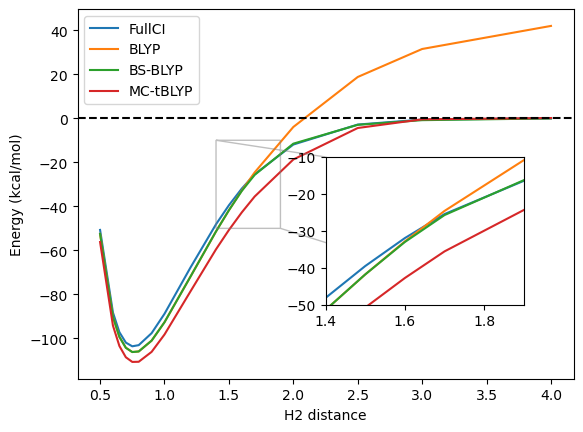

In [13]:
y5 = np.array(E_tblyp) * 627.5

fig, ax = plt.subplots()
ax.plot(x, y1, label="FullCI")
ax.plot(x, y3, label="BLYP")
ax.plot(x, y4, label="BS-BLYP")
ax.plot(x, y5, label="MC-tBLYP")
ax.axhline(y=0, color="k", linestyle="--")
ax.set_xlabel("H2 distance")
ax.set_ylabel("Energy (kcal/mol)")
ax.legend()

axin = ax.inset_axes([0.5, 0.2, 0.4, 0.4])
axin.set_xlim(1.4, 1.9)
axin.set_ylim(-50, -10)
axin.plot(x, y1, label="FullCI")
axin.plot(x, y3, label="BLYP")
axin.plot(x, y4, label="BS-BLYP")
axin.plot(x, y5, label="MC-tBLYP")
ax.indicate_inset_zoom(axin)

plt.show()